In [21]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [22]:
df=pd.read_csv(r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print(df.shape)

(891, 12)


In [26]:
df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))

In [27]:
df=df.drop('Cabin',axis=1)

In [28]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [29]:
def age_categories(age):
    if age <= 15:
        return 'Child'
    elif 16 <= age <= 30:
        return 'Young Adult'
    elif 31 <= age <= 45:
        return 'Adult'
    elif 46 <= age <= 60:
        return 'Middle Aged'
    else:
        return 'Senior'

df['AgeCategories'] = df['Age'].apply(age_categories)


In [30]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked AgeCategories  
0      0         A/5 21171   7.2500        S   Young Adult  
1      0          PC 17599  71.2833        C         Adult  
2      0  STON/O2. 3101282   7.9250        S   Young Adult  
3      0            113803  53.1000        S         Adult  
4      0       

In [31]:
df['FamilySize'] = df['SibSp'] + df['Parch']


def extract_title(name):
    if 'Mr.' in name:
        return 'Mr'
    elif 'Mrs.' in name:
        return 'Mrs'
    elif 'Miss.' in name:
        return 'Miss'
    elif 'Master.' in name:
        return 'Master'
    else:
        return 'Other'

df['Title'] = df['Name'].apply(extract_title)


df['FareRange'] = pd.cut(df['Fare'], bins=[0, 10, 30, 70, 100], labels=['Low', 'Medium', 'High', 'Very High'])
df['FarePerPerson'] = df['Fare'] / (df['FamilySize'] + 1)


print(df.head(3))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked AgeCategories  FamilySize Title  \
0      0         A/5 21171   7.2500        S   Young Adult           1    Mr   
1      0          PC 17599  71.2833        C         Adult           1   Mrs   
2      0  STON/O2. 3101282   7.9250        S   Young Adult           0  Miss   

   FareRange  FarePerPerson  
0        Low        3.62500  
1  Very High       35.64165  
2        Low        7.92500  


AttributeError: 'numpy.int64' object has no attribute 'startswith'

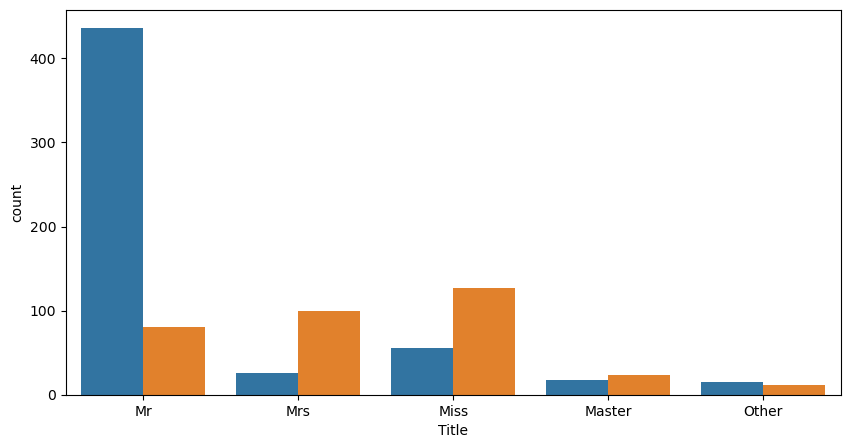

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Title', hue='Survived')
plt.title('Survival Count by Title')
plt.show()

In [33]:
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Passenger Class:")
print(survival_by_pclass)


Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [34]:
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Survival Rate by Gender:")
print(survival_by_gender)


Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [35]:
survival_by_age_category = df.groupby('AgeCategories')['Survived'].mean()
print("Survival Rate by Age Category:")
print(survival_by_age_category)


Survival Rate by Age Category:
AgeCategories
Adult          0.434783
Child          0.590361
Middle Aged    0.417722
Senior         0.192308
Young Adult    0.327696
Name: Survived, dtype: float64


In [36]:
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()
print("Survival Rate by Port of Embarkation:")
print(survival_by_embarked)


Survival Rate by Port of Embarkation:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [37]:
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()
print("Survival Rate by Port of Embarkation:")
print(survival_by_embarked)


Survival Rate by Port of Embarkation:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [38]:
survival_by_family_size = df.groupby('FamilySize')['Survived'].mean()
print("Survival Rate by Family Size:")
print(survival_by_family_size)


Survival Rate by Family Size:
FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


In [39]:
survival_alone = df[df['FamilySize'] == 0]['Survived'].mean()

survival_with_family = df[df['FamilySize'] > 0]['Survived'].mean()

print(f"Survival Rate for Traveling Alone: {survival_alone:.2f}")
print(f"Survival Rate for Traveling with Family: {survival_with_family:.2f}")


Survival Rate for Traveling Alone: 0.30
Survival Rate for Traveling with Family: 0.51


In [42]:
# Pivot table for survival rates by class and gender
survival_by_class_gender = pd.pivot_table(df, values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
print("Survival Rates by Class and Gender:")
print(survival_by_class_gender)


Survival Rates by Class and Gender:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [43]:
# Pivot table for survival rates by age group and class
survival_by_age_class = pd.pivot_table(df, values='Survived', index='AgeCategories', columns='Pclass', aggfunc='mean')
print("Survival Rates by Age Group and Class:")
print(survival_by_age_class)


Survival Rates by Age Group and Class:
Pclass                1         2         3
AgeCategories                              
Adult          0.645161  0.462963  0.180723
Child          0.833333  1.000000  0.431034
Middle Aged    0.574468  0.300000  0.000000
Senior         0.200000  0.333333  0.125000
Young Adult    0.745455  0.409091  0.236364


In [45]:
# Correlation between fare and survival
correlation_fare_survival = df['Fare'].corr(df['Survived'])
print(f"Correlation between Fare and Survival: {correlation_fare_survival:.2f}")


Correlation between Fare and Survival: 0.26


In [46]:
import scipy.stats as stats

# Chi-square test between Pclass and Survived
chi2_stat, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['Pclass'], df['Survived']))

print(f"Chi-square test between Pclass and Survived:\nChi2 Stat: {chi2_stat}\nP-Value: {p_value}")


Chi-square test between Pclass and Survived:
Chi2 Stat: 102.88898875696056
P-Value: 4.549251711298793e-23


AttributeError: 'numpy.int64' object has no attribute 'startswith'

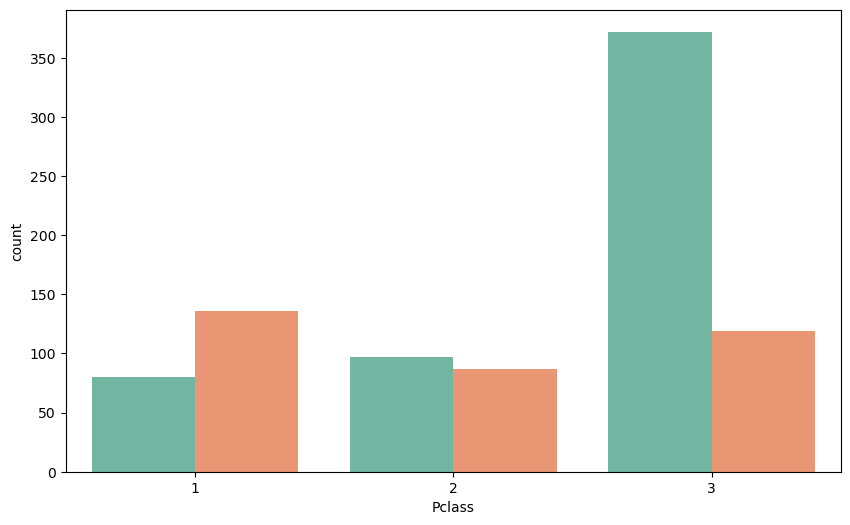

In [48]:
# Survival distribution by passenger class and gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set2')
plt.title('Survival Distribution by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper left', labels=['No', 'Yes'])
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


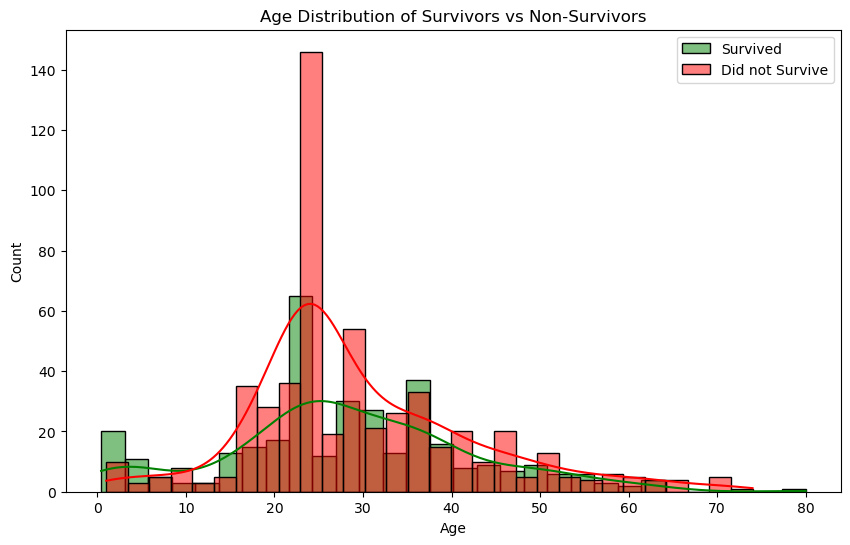

In [49]:
# Age distribution of survivors vs non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Did not Survive')
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


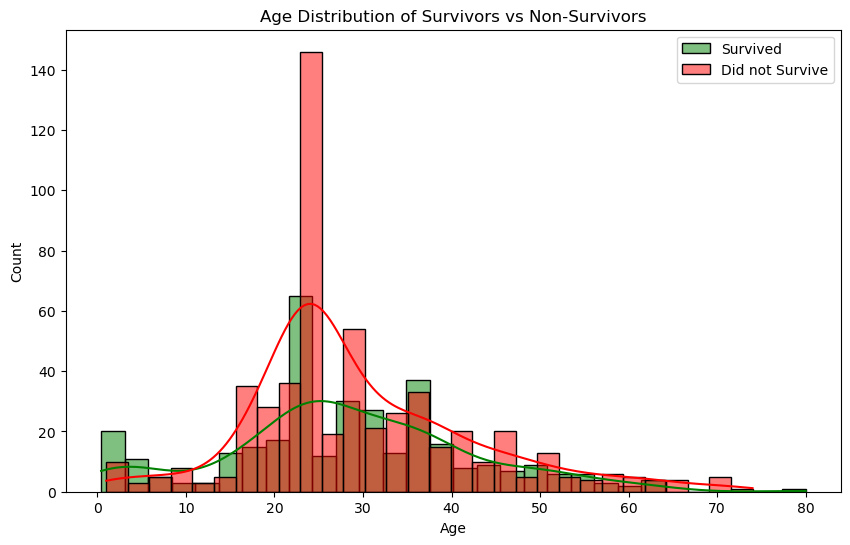

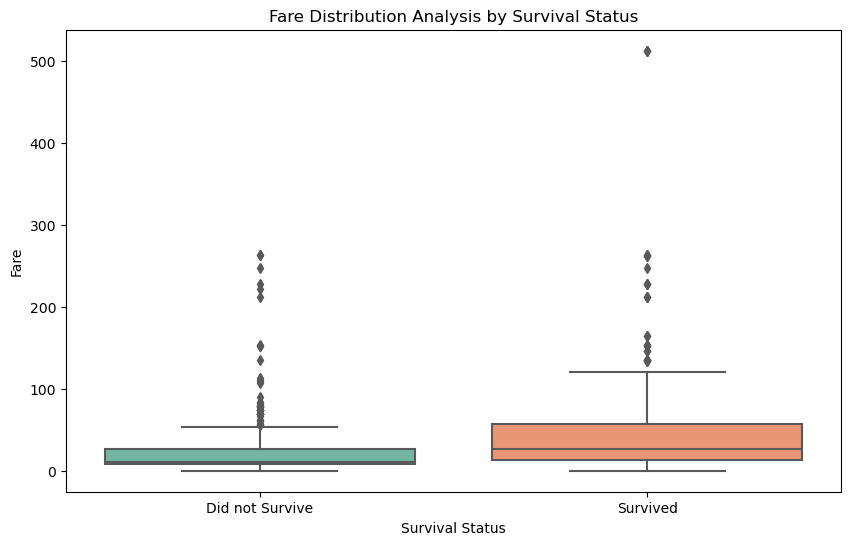

In [51]:
# Age distribution of survivors vs non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Did not Survive')
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()# Fare distribution analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Survived', y='Fare', palette='Set2')
plt.title('Fare Distribution Analysis by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Did not Survive', 'Survived'])
plt.show()

plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

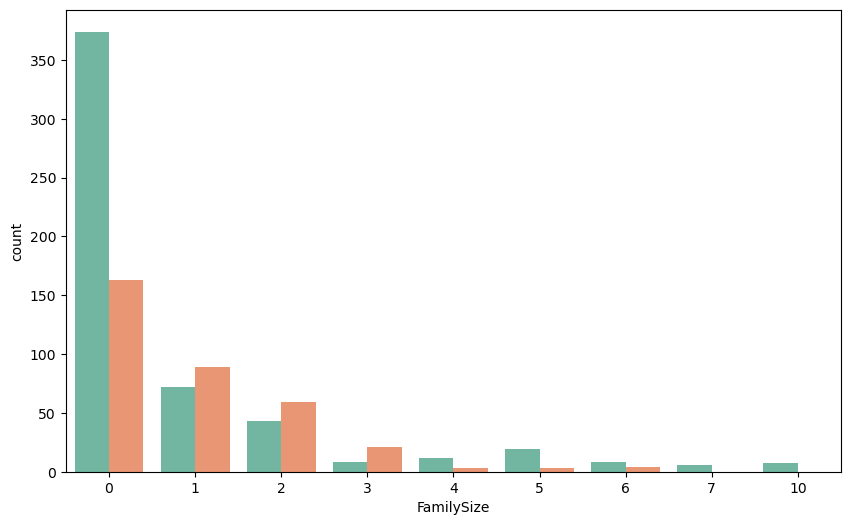

In [52]:
# Family size impact on survival
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FamilySize', hue='Survived', palette='Set2')
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper left', labels=['No', 'Yes'])
plt.show()
